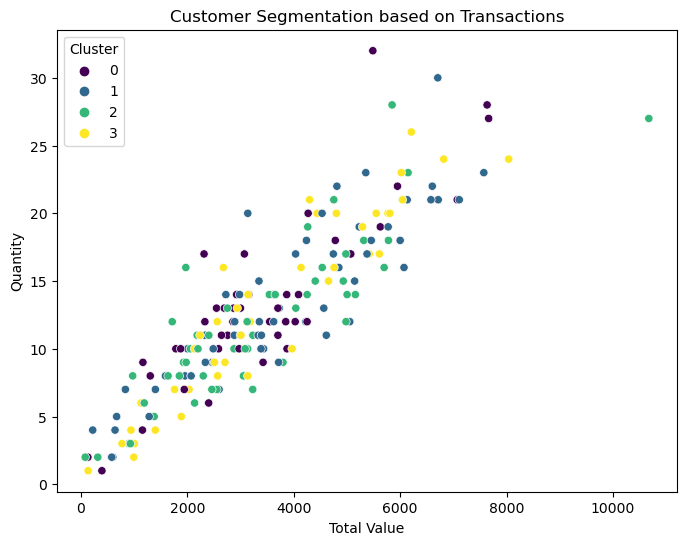

Number of clusters: 4
Davies-Bouldin Index: 0.7402
Silhouette Score: 0.5620


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Load datasets

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets

merged_df = transactions.merge(customers, on='CustomerID')

# Feature Engineering: Aggregate transaction data per customer

customer_features = merged_df.groupby('CustomerID').agg({
'TotalValue': 'sum',
'Quantity': 'sum'
}).reset_index()

# Merge region data and encode categorical variables

customer_features = customer_features.merge(customers[['CustomerID', 'Region']], on='CustomerID')
customer_features = pd.get_dummies(customer_features, columns=['Region'])

# Scale numerical data

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

# Perform clustering with K-Means

num_clusters = 4  # Chosen after testing different values
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate clustering using Davies-Bouldin Index and silhouette score

db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
silhouette_avg = silhouette_score(scaled_features, customer_features['Cluster'])

# Visualize clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_features['TotalValue'], y=customer_features['Quantity'], hue=customer_features['Cluster'], palette='viridis')
plt.title('Customer Segmentation based on Transactions')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.show()

# Save clustering results to CSV

customer_features[['CustomerID', 'Cluster']].to_csv('Customer_Segments.csv', index=False)

# Print clustering metrics

print(f'Number of clusters: {num_clusters}')
print(f'Davies-Bouldin Index: {db_index:.4f}')
print(f'Silhouette Score: {silhouette_avg:.4f}')